In [1]:
#확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합, 과대적합이 될 수 있다.
# 적으면 => 모델이 훈련 세트를 덜 학습. 많으면 완전히 학습. 그러나 역으로 훈련 세트에 너무 잘 맞을수도.

#훈련 세트 점수는 에포크가 진행되면 계속 증가하지만, 테스트 점수는 어느 순간 감소한다. => 과대적합 시작 => 조기종료 필요

In [3]:
#사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 => SGDclassifier

#####SGDclassifier의 객체를 만들 때 2개의 매개변수를 지정해야 한다. 
#손실함수, 즉 loss = log
#max_iter, 수행할 에포크 횟수 지정. 10이면 전체 훈련 세트를 10회 반복


훈련 점수 :  0.773109243697479
테스트 점수 :  0.775
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [4]:
#page207 
#SGD classifier

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)            #특성값의 스케일까지 맞춤

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print("훈련 점수 : ", sc.score(train_scaled, train_target))  #훈련 점수 :  0.773109243697479
print("테스트 점수 : ", sc.score(test_scaled, test_target))  #테스트 점수 :  0.775

훈련 점수 :  0.773109243697479
테스트 점수 :  0.775
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [7]:
#에포크의 과대/과소 적합 알아보기
#fit메서드를 사용하지 않고 partial_fit()만 사용 => 사용하려면 훈렌 셔트에 있는 전체 클래스의 레이블을 partial_fit() 매서드에 전달해야한다.

import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score = []
classes = np.unique(train_target)  #['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

es\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

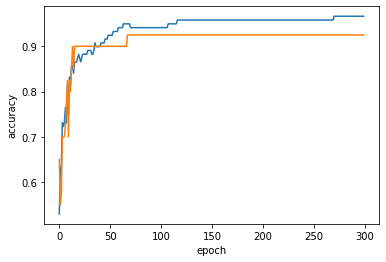

0.957983193277311
0.925
C:\Users\YOONJUNHO\.conda\envs\cpv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#100번째 에포크 이후에는 과대적합, 초기에는 과소적합. => 100정도가 적당해보인다. 다시 훈련 시켜보자.

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))  #0.957983193277311
print(sc.score(test_scaled, test_target))    #0.925

#sgd는 일정 에포크동안 성능이 향상되지 않으면 자동으로 멈추는 기능 제공
#tol 매개변수에서 향상될 최솟값 지정. =>None으로 하여 멈추지 않게 지정

In [ ]:
###212 - 213 생략